In [1]:
import pandas as pd
pd.set_option('max_colwidth',200)
import numpy as np
import os
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt

### 收集数据
#### WeRateDog的twitter档案

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


#### twitter图像预测数据

In [3]:
# download the file of image predictions from the URL

url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)
        

In [4]:
# upload the date from the file
image_predictions = pd.read_csv(url.split('/')[-1], sep='\t')


#### twitter附加数据

In [5]:
'''# get twitter API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)'''


"# get twitter API\nconsumer_key = 'YOUR CONSUMER KEY'\nconsumer_secret = 'YOUR CONSUMER SECRET'\naccess_token = 'YOUR ACCESS TOKEN'\naccess_secret = 'YOUR ACCESS SECRET'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)"

In [6]:
'''# find the twitter content
for tweet_id in twitter_archive['tweet_id']:
    try:
        # download the content of the specific id
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        # append data into txt
        with open('tweet_json.txt', 'w') as f:
            f.write(json.dump(tweet, f, ensure_ascii=False))
    # not best practice to catch all exceptions        
    except Exception as e:
        print('%: The content of % has been deleted'.format(e, tweet_id))'''
        

"# find the twitter content\nfor tweet_id in twitter_archive['tweet_id']:\n    try:\n        # download the content of the specific id\n        tweet = api.get_status(tweet_id, tweet_mode='extended')\n        # append data into txt\n        with open('tweet_json.txt', 'w') as f:\n            f.write(json.dump(tweet, f, ensure_ascii=False))\n    # not best practice to catch all exceptions        \n    except Exception as e:\n        print('%: The content of % has been deleted'.format(e, tweet_id))"

In [7]:
# read txt data to build a list of dictionary
json_list = []

with open('tweet_json.txt', 'r') as f:
    for line in f.readlines():
        df = json.loads(line)

        json_list.append(df)


In [8]:
# create DataFrame from list of dictionary
df_list = []
for item in json_list:
    tweet_ID = item['id']
    retweet_count = item['retweet_count']
    favorite_count = item['favorite_count']
    
    df_list.append({'tweet_id': tweet_ID,
                   'retweet_count': retweet_count,
                   'favorite_count': favorite_count})
    
tweet_extra_data = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


In [9]:
'''##json文件的简单读取方式
df_json = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']'''

"##json文件的简单读取方式\ndf_json = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]\ndf_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']"

### 数据评估

通过目测评估和编程评估的方式对数据进行质量及整洁度的评估

#### 质量 quality  

*twitter_archive table*
* 'tweet_id' is an int not a string
* The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' have too much missing data 
* The dataset doesn't need retweet contents
* 'timestamp' is a string not a datatype and contains '+0000'
* 'source' includes useless infomation such like http link
* 'expanded_urls' has null value in a row
* Min and max numbers of the 'rating_numerator' and 'rating_denominator' are not correct
* Many None or a/an in 'name'
* 'doggo', 'floofer', 'pupper', 'puppo' contain too many None
* Delete the data after 8/1/2017

*image_predictions table*
* 'tweet_id' and 'img_num' is an int not a string
* The duplicates in 'jpg_url' column

*tweet_extra_data table*
* 'tweet_id' is an int not a string


#### 整洁度 tidiness
* Dog stage is in four different columns (doggo, floofer, pupper, puppo)
* Three tables can be merged


In [10]:
twitter_archive.sample(30)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
18    888554962724278272                    NaN                  NaN   
214   851464819735769094                    NaN                  NaN   
825   769695466921623552                    NaN                  NaN   
1808  676897532954456065                    NaN                  NaN   
529   808344865868283904                    NaN                  NaN   
804   772117678702071809                    NaN                  NaN   
1138  728035342121635841                    NaN                  NaN   
2232  668221241640230912                    NaN                  NaN   
651   792773781206999040                    NaN                  NaN   
1008  747594051852075008                    NaN                  NaN   
69    879050749262655488                    NaN                  NaN   
707   785515384317313025                    NaN                  NaN   
1893  674752233200820224                    NaN                  NaN   
805   772114945936949249                    NaN                  NaN   
1076  739606147276148736                    NaN                  NaN   
483   814986499976527872                    NaN                  NaN   
1822  676575501977128964                    NaN                  NaN   
2049  671504605491109889                    NaN                  NaN   
1604  685906723014619143                    NaN                  NaN   
953   751830394383790080                    NaN                  NaN   
847   766078092750233600                    NaN                  NaN   
96    873580283840344065                    NaN                  NaN   
1720  680145970311643136                    NaN                  NaN   
1178  719551379208073216                    NaN                  NaN   
223   849412302885593088                    NaN                  NaN   
1775  678021115718029313                    NaN                  NaN   
1886  674790488185167872                    NaN                  NaN   
837   767754930266464257                    NaN                  NaN   
1398  699775878809702401                    NaN                  NaN   
1820  676588346097852417                    NaN                  NaN   

                      timestamp  \
18    2017-07-22 00:23:06 +0000   
214   2017-04-10 16:00:07 +0000   
825   2016-08-28 00:37:54 +0000   
1808  2015-12-15 22:52:02 +0000   
529   2016-12-12 16:16:49 +0000   
804   2016-09-03 17:02:54 +0000   
1138  2016-05-05 01:35:26 +0000   
2232  2015-11-22 00:15:33 +0000   
651   2016-10-30 17:02:53 +0000   
1008  2016-06-28 00:54:46 +0000   
69    2017-06-25 18:56:45 +0000   
707   2016-10-10 16:20:36 +0000   
1893  2015-12-10 00:47:23 +0000   
805   2016-09-03 16:52:02 +0000   
1076  2016-06-05 23:53:41 +0000   
483   2016-12-31 00:08:17 +0000   
1822  2015-12-15 01:32:24 +0000   
2049  2015-12-01 01:42:28 +0000   
1604  2016-01-09 19:31:20 +0000   
953   2016-07-09 17:28:29 +0000   
847   2016-08-18 01:03:45 +0000   
96    2017-06-10 16:39:04 +0000   
1720  2015-12-24 22:00:10 +0000   
1178  2016-04-11 15:43:12 +0000   
223   2017-04-05 00:04:08 +0000   
1775  2015-12-19 01:16:45 +0000   
1886  2015-12-10 03:19:24 +0000   
837   2016-08-22 16:06:54 +0000   
1398  2016-02-17 02:02:25 +0000   
1820  2015-12-15 02:23:26 +0000   

                                                                                  source  \
18    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
214   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
825   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1808  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
529                      <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
804   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1138  <a href="http://twitter.com/download/iphone" re

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [13]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
306   836001077879255040                    NaN                  NaN   
1298  707741517457260545                    NaN                  NaN   
134   866686824827068416                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
1841  675878199931371520                    NaN                  NaN   

                      timestamp  \
306   2017-02-26 23:52:43 +0000   
1298  2016-03-10 01:35:01 +0000   
134   2017-05-22 16:06:55 +0000   
8     2017-07-27 16:25:51 +0000   
1841  2015-12-13 03:21:34 +0000   

                                                                                  source  \
306   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1298  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
134   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
8     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1841  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                text  \
306               Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE   
1298                    When your roommate eats your leftover Chili's but you pretend it's no big deal cuz you fat anyway. 10/10 head up pup https://t.co/0nMgoue8IR   
134   This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z   
8                 This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b   
1841                          Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI   

      retweeted_status_id  retweeted_status_user_id  \
306                   NaN                       NaN   
1298                  NaN                       NaN   
134                   NaN                       NaN   
8                     NaN                       NaN   
1841                  NaN                       NaN   

     retweeted_status_timestamp  \
306                         NaN   
1298                        NaN   
134                         NaN   
8                           NaN   
1841                        NaN   

                                                                                                                                                                                                expanded_urls  \
306   https://twitter.com/dog_rates/status/836001077879255040/photo/1,https://twitter.com/dog_rates/status/836001077879255040/photo/1,https://twitter.com/dog_rates/status/836001077879255040/photo/1,http...   
1298                                                                                                                                          https://twitter.com/dog_rates/status/707741517457260545/photo/1   
134                                                                           https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1   
8                                                                                                                                             https://twitter.com/dog_rates/status/890609185150312448/photo/1   
1841                                                                                                                                          https://twitter.com/dog_rates/status/675878199931371520/photo/1   

      rating_

In [14]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Toby         7
Buddy        7
Bailey       7
an           7
Leo          6
Rusty        6
Stanley      6
Dave         6
Scout        6
Jax          6
Jack         6
Koda         6
Milo         6
Bella        6
Oscar        6
Bentley      5
          ... 
Venti        1
Carll        1
Glenn        1
Batdog       1
Pepper       1
Simba        1
Jim          1
Gustaf       1
Dale         1
Anna         1
Mona         1
Pubert       1
Bayley       1
Adele        1
Zoe          1
Jo           1
Ester        1
Pavlov       1
Furzey       1
Hazel        1
Tedders      1
Lassie       1
Beemo        1
Ambrose      1
Fido         1
Jerome       1
Julio        1
Clarkus      1
Suki         1
Margo        1
Name: name, Length: 957, dtype: int64

In [15]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [17]:
image_predictions.sample(10)

tweet_id                                          jpg_url  \
1746  823269594223824897  https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg   
309   671538301157904385  https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg   
594   679503373272485890  https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg   
1821  834574053763584002  https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg   
1480  780858289093574656  https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg   
157   668852170888998912  https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg   
795   690938899477221376  https://pbs.twimg.com/media/CZa1QnSWEAAEOVr.jpg   
472   675145476954566656  https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg   
1309  754011816964026368  https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg   
1820  834458053273591808  https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg   

      img_num                        p1   p1_conf  p1_dog                p2  \
1746        1                   Samoyed  0.585441    True        Pomeranian   
309         1                park_bench  0.194211   False      water_bottle   
594         1                 porcupine  0.999846   False           meerkat   
1821        1             toilet_tissue  0.262936   False  golden_retriever   
1480        1  Chesapeake_Bay_retriever  0.488555    True    Sussex_spaniel   
157         1          golden_retriever  0.903529    True   Tibetan_mastiff   
795         1                    geyser  0.370318   False          seashore   
472         1        Labrador_retriever  0.458746    True        Great_Dane   
1309        1            French_bulldog  0.600985    True       Boston_bull   
1820        1       Rhodesian_ridgeback  0.468619    True           whippet   

       p2_conf  p2_dog                         p3   p3_conf  p3_dog  
1746  0.193654    True                 Arctic_fox  0.071648   False  
309   0.071870   False                     beacon  0.053433   False  
594   0.000072   False                    echidna  0.000044   False  
1821  0.226564    True                    bathtub  0.078879   False  
1480  0.271655    True                     kelpie  0.106913    True  
157   0.041497    True                     kuvasz  0.022500    True  
795   0.274888   False                     beacon  0.046397   False  
472   0.235504    True  Staffordshire_bullterrier  0.116864    True  
1309  0.273176    True                      boxer  0.056772    True  
1820  0.177531    True                    redbone  0.106552    True

In [18]:
image_predictions[image_predictions.jpg_url.duplicated()]

tweet_id  \
1297  752309394570878976   
1315  754874841593970688   
1333  757729163776290825   
1345  759159934323924993   
1349  759566828574212096   
1364  761371037149827077   
1368  761750502866649088   
1387  766078092750233600   
1407  770093767776997377   
1417  771171053431250945   
1427  772615324260794368   
1446  775898661951791106   
1453  776819012571455488   
1456  777641927919427584   
1463  778396591732486144   
1476  780496263422808064   
1487  782021823840026624   
1495  783347506784731136   
1510  786036967502913536   
1522  788070120937619456   
1538  790723298204217344   
1541  791026214425268224   
1564  793614319594401792   
1569  794355576146903043   
1571  794983741416415232   
1579  796177847564038144   
1588  798340744599797760   
1589  798628517273620480   
1590  798644042770751489   
1591  798665375516884993   
...                  ...   
1619  802624713319034886   
1624  803692223237865472   
1627  804413760345620481   
1634  805958939288408065   
1636  806242860592926720   
1640  807059379405148160   
1645  808134635716833280   
1652  809808892968534016   
1683  813944609378369540   
1693  816014286006976512   
1699  816829038950027264   
1703  817181837579653120   
1712  818588835076603904   
1717  819015331746349057   
1718  819015337530290176   
1727  820446719150292993   
1736  821813639212650496   
1742  822647212903690241   
1746  823269594223824897   
1755  824796380199809024   
1789  829878982036299777   
1803  832040443403784192   
1804  832215726631055365   
1858  841833993020538882   
1864  842892208864923648   
1903  851953902622658560   
1944  861769973181624320   
1992  873697596434513921   
2041  885311592912609280   
2055  888202515573088257   

                                                                                      jpg_url  \
1297  https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg   
1315                                          https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333                                          https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345                                          https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349                                          https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   
1364                              https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg   
1368                                          https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   
1387                                          https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg   
1407                                          https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg   
1417                                          https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg   
1427                                          https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg   
1446                                          https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg   
1453                                          https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg   
1456                                          https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg   
1463                                          https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg   
1476                                          https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
1487                                          https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg   
1495                                          https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   
1510                                          https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg   
1522                                          https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
1538                                          https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1541                                          https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg   
1564                                          ht

In [19]:
tweet_extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
tweet_extra_data.describe()

tweet_id  retweet_count  favorite_count
count  2.352000e+03    2352.000000     2352.000000
mean   7.425913e+17    3134.932398     8109.198980
std    6.846210e+16    5237.846296    11980.795669
min    6.660209e+17       0.000000        0.000000
25%    6.783949e+17     618.000000     1417.000000
50%    7.193536e+17    1456.500000     3596.500000
75%    7.991219e+17    3628.750000    10118.000000
max    8.924206e+17   79116.000000   132318.000000

In [21]:
tweet_extra_data.sample(10)

tweet_id  retweet_count  favorite_count
1350  703631701117943808            766            2840
612   796563435802726400           8471               0
763   777684233540206592           3390           12468
2094  670727704916926465            401             882
1495  692187005137076224            924            2755
950   751793661361422336           3299            6448
660   790946055508652032           5468           18527
2046  671497587707535361            479             975
2073  670833812859932673            134             472
127   867421006826221569           2673           16683

### 数据清理


In [22]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_extra_data_clean = tweet_extra_data.copy()

#### 缺失数据

`twitter_archive`: 
* The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' have too much missing data. 
* The dataset doesn't need retweet contents

###### define

* Delete the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
* Delete the rows including the 'in_reply_to_status_id' and 'retweeted_status_user_id'

###### code

In [23]:
# Delete the rows including the 'in_reply_to_status_id' and 'retweeted_status_user_id'

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id'].isnull()]

In [24]:
# Delete the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                            'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

###### test

In [25]:
twitter_archive_clean.sample(5)

tweet_id                  timestamp  \
954   751793661361422336  2016-07-09 15:02:31 +0000   
1941  673715861853720576  2015-12-07 04:09:13 +0000   
1229  713761197720473600  2016-03-26 16:15:05 +0000   
2103  670676092097810432  2015-11-28 18:50:15 +0000   
1929  674042553264685056  2015-12-08 01:47:22 +0000   

                                                                                  source  \
954                      <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
1941  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1229  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2103  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1929  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                        text  \
954                                                            This is Fred. He's having one heck of a summer. 11/10 https://t.co/I7SFchkNk4   
1941  This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl   
1229         This is Piper. She would really like that tennis ball core. Super sneaky tongue slip. 12/10 precious af https://t.co/QP6GHi5az9   
2103                    This is Bloo. He's a Westminster Cîroc. Doesn't think Bart deserves legs. Nice flowers. 8/10 https://t.co/IAc1QCczMc   
1929                                          Yea I can't handle the cuteness anymore. Curls for days. 12/10 for all https://t.co/sAI6gCGZYX   

                                                                                                                        expanded_urls  \
954                                                                                                     https://vine.co/v/5W5YHdTJvaV   
1941                                                                  https://twitter.com/dog_rates/status/673715861853720576/photo/1   
1229  https://twitter.com/dog_rates/status/713761197720473600/photo/1,https://twitter.com/dog_rates/status/713761197720473600/photo/1   
2103                                                                  https://twitter.com/dog_rates/status/670676092097810432/photo/1   
1929                                                                  https://twitter.com/dog_rates/status/674042553264685056/photo/1   

      rating_numerator  rating_denominator   name doggo floofer pupper puppo  
954                 11                  10   Fred  None    None   None  None  
1941                 4                  10      a  None    None   None  None  
1229                12                  10  Piper  None    None   None  None  
2103                 8                  10   Bloo  None    None   None  None  
1929                12                  10   None  None    None   None  None

##### Tidiness


`twitter_archive`:
* Dog stage is in four different columns (doggo, floofer, pupper, puppo)

###### define

* Find the stage from the text
* Delete the 'doggo', 'floofer', 'pupper', 'puppo' columns

###### code

In [26]:
# Find the stage from the text
twitter_archive_clean['stage'] = twitter_archive_clean.text.str.lower().str.findall('(doggo|floofer|pupper|puppo)')

# Transfer 'stage' list to string
twitter_archive_clean['stage'] = twitter_archive_clean.stage.str.join(',')


In [27]:
# Delete the 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### test

In [28]:
twitter_archive_clean.sample(5)

tweet_id                  timestamp  \
2291  667165590075940865  2015-11-19 02:20:46 +0000   
1753  678800283649069056  2015-12-21 04:52:53 +0000   
1507  691675652215414786  2016-01-25 17:35:00 +0000   
1391  700143752053182464  2016-02-18 02:24:13 +0000   
344   832032802820481025  2017-02-16 01:04:13 +0000   

                                                                                  source  \
2291  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1753  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1507  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1391  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
344   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                       text  \
2291                                This is Churlie. AKA Fetty Woof. Lost eye saving a school bus full of toddlers from a tsunami. Great guy. 10/10 https://t.co/li2XYBVuAY   
1753                                                                          Here's a pupper with some mean tan lines. Snazzy sweater though 12/10 https://t.co/DpCSVsl6vu   
1507                                                     This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both https://t.co/KMdwNgONkV   
1391                           When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ   
344   This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M   

                                                                                                                                                                                                expanded_urls  \
2291                                                                                                                                          https://twitter.com/dog_rates/status/667165590075940865/photo/1   
1753                                                                                                                                          https://twitter.com/dog_rates/status/678800283649069056/photo/1   
1507                                                                                                                                          https://twitter.com/dog_rates/status/691675652215414786/photo/1   
1391                                                                                                                                          https://twitter.com/dog_rates/status/700143752053182464/photo/1   
344   https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog...   

      rating_numerator  rating_denominator     name   stage  
2291                10                  10  Churlie          
1753                12                  10     None  pupper  
1507                10                  10   Richie          
1391                10                  10     None  pupper  
344                 12                  10   Miguel   doggo

In [29]:
twitter_archive_clean['stage'].value_counts()

                             1723
pupper                        236
doggo                          77
puppo                          28
pupper,pupper                   9
floofer                         9
doggo,pupper                    5
pupper,doggo                    3
doggo,doggo                     2
doggo,floofer                   1
pupper,doggo,pupper,doggo       1
puppo,doggo,puppo               1
pupper,pupper,pupper            1
puppo,doggo                     1
Name: stage, dtype: int64

In [30]:
twitter_archive_clean.to_csv('test.csv')

##### redefine
* Check the text again and find the reasons
* If the stages are the same then keep it.
* If there are two or more stages in a text which there are two or more dogs so that delete it.

##### code

In [31]:
# change the stage status
twitter_archive_clean['stage'].replace({'pupper,pupper':'pupper', 'doggo,doggo': 'doggo', 
                                        'pupper,pupper,pupper': 'pupper'}, inplace=True)

In [32]:
# delete the rows which stage contains two or more stages.
twitter_archive_clean = twitter_archive_clean[(~twitter_archive_clean.stage.str.contains(','))]

##### test

In [33]:
twitter_archive_clean['stage'].value_counts()

           1723
pupper      246
doggo        79
puppo        28
floofer       9
Name: stage, dtype: int64

##### merge three tables at the final step

#### Quality

#### `twitter_archive` & `image_predictions` & `tweet_extra_data`:
* 'tweet_id' is an int not a string

###### define

* Cover the 'tweet_id' column's data from float to a string

###### code

In [34]:
# Cover the 'tweet_id' column's data from float to a string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_extra_data_clean['tweet_id'] = tweet_extra_data_clean['tweet_id'].astype(str)

##### test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2085 non-null object
timestamp             2085 non-null object
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2082 non-null object
rating_numerator      2085 non-null int64
rating_denominator    2085 non-null int64
name                  2085 non-null object
stage                 2085 non-null object
dtypes: int64(2), object(7)
memory usage: 162.9+ KB


In [36]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB



#### `twitter_archive`:
* 'timestamp' is a string not a datatype


##### define
* Slice the 'timestamp' without +0000
* Cover the 'timestamp' column's data from string to datatime

##### code

In [37]:
# Slice the 'timestamp' without +0000
# Cover the 'timestamp' column's data from string to datatime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp[:-6])

##### test

In [38]:
twitter_archive_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name stage  
0                13                  10   Phineas        
1                13                  10     Tilly        
2                12                  10    Archie        
3                13                  10     Darla        
4                12                  10  Franklin

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2085 non-null object
timestamp             2079 non-null datetime64[ns]
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2082 non-null object
rating_numerator      2085 non-null int64
rating_denominator    2085 non-null int64
name                  2085 non-null object
stage                 2085 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.9+ KB


#### `twitter_archive`:
* 'source' includes useless infomation such like http link

##### define
* Just cut out the info of where the source comes, such like Twitter for iPhone, Twitter Web Client and Vine - Make a Scene

##### code

In [40]:
twitter_archive_clean['source'] = twitter_archive_clean.source.str.extract('(>(.+)<)', expand=True)
twitter_archive_clean['source'] = twitter_archive_clean.source.str.extract('([A-Z]\D+[a-z])', expand=True)

##### test

In [41]:
twitter_archive_clean.sample()

tweet_id           timestamp              source  \
1500  692158366030913536 2016-01-27 01:33:08  Twitter for iPhone   

                                                                                                                                   text  \
1500  This is Edgar. He's a Sassafras Puggleflash. Nothing satisfies him. Not since the war. 10/10 cheer up pup https://t.co/1NgMb9BTWB   

                                                        expanded_urls  \
1500  https://twitter.com/dog_rates/status/692158366030913536/photo/1   

      rating_numerator  rating_denominator   name stage  
1500                10                  10  Edgar

#### `twitter_archive`:
* 'expanded_urls' has null value in a row

##### define
* Keep the rows which is not null using `notnull()`

##### code

In [42]:
# Keep the rows which is not null using notnull()

twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

tweet_id           timestamp              source  \
375   828361771580813312 2017-02-05 21:56:51  Twitter Web Client   
707   785515384317313025 2016-10-10 16:20:36  Twitter for iPhone   
1445  696518437233913856 2016-02-08 02:18:30  Twitter for iPhone   

                                                           text expanded_urls  \
375   Beebop and Doobert should start a band 12/10 would listen           NaN   
707              Today, 10/10, should be National Dog Rates Day           NaN   
1445            Oh my god 10/10 for every little hot dog pupper           NaN   

      rating_numerator  rating_denominator  name   stage  
375                 12                  10  None          
707                 10                  10  None          
1445                10                  10  None  pupper

In [43]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

#####  测试

In [44]:
twitter_archive_clean['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                      2
https://twitter.com/dog_rates/status/888078434458587136/photo/1,https://twitter.com/dog_rates/status/888078434458587136/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/699413908797464576/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/673352124999274496/photo/1                                                                                                                                                          

In [45]:
twitter_archive_clean.sample(5)

tweet_id           timestamp               source  \
688   787810552592695296 2016-10-17 00:20:47   Twitter for iPhone   
304   836380477523124226 2017-02-28 01:00:19   Twitter for iPhone   
1528  690348396616552449 2016-01-22 01:40:58  Vine - Make a Scene   
839   767191397493538821 2016-08-21 02:47:37   Twitter for iPhone   
1503  692017291282812928 2016-01-26 16:12:33   Twitter for iPhone   

                                                                                                                                                             text  \
688                                    This is Frank. He wears sunglasses and walks himself. 11/10 I'll never be this cool or independent https://t.co/pNNjBtHWPc   
304   This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q   
1528                                                This is Oddie. He's trying to communicate. 12/10 very solid effort (vid by @kaleseyy) https://t.co/JjxriLqZOL   
839                       I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT   
1503                  This is Kingsley Wellensworth III. He owns 7 range rovers. Has a cardigan collection. Would rather be sailing. 9/10 https://t.co/BE4ahQ0IO2   

                                                                                                                        expanded_urls  \
688   https://twitter.com/dog_rates/status/787810552592695296/photo/1,https://twitter.com/dog_rates/status/787810552592695296/photo/1   
304                                                                   https://twitter.com/dog_rates/status/836380477523124226/photo/1   
1528                                                                                                    https://vine.co/v/iejBWerY9X2   
839                                                                   https://twitter.com/dog_rates/status/767191397493538821/photo/1   
1503                                                                  https://twitter.com/dog_rates/status/692017291282812928/photo/1   

      rating_numerator  rating_denominator      name   stage  
688                 11                  10     Frank          
304                 12                  10       Ava  pupper  
1528                12                  10     Oddie          
839                 13                  10      None   doggo  
1503                 9                  10  Kingsley

#### `twitter_archive`:
* Min and max numbers of the 'rating_numerator' and 'rating_denominator' are not correct

##### define
* Reselect the rating numbers from the texts
* Check the outlier
* If the denominator is not 10, double check the text or delete the row

##### code

在这个数据集中，评分存在以下问题：  
1）分子是小数，但是只提取了小数点后面的数字的情况，比如 11.26/10，提取为了 26/10；  
2）多只狗狗评的总分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除；  
3）同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确的：@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho  
4）比较单独的错误，比如 24/7 指的是7天 24 小时，并不是一个评分，这条推文中也没有具体的评分，可以 drop 掉；  

In [46]:
# 提取出的分子是带有小数点的，分母是10的倍数
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
# 用新提取的数据替换掉原有的数据，记得修改分子的类型
twitter_archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

当然，这样重新提取后，还是可能存在一个推文中有多个评分的情况，针对有多个分数的情况，因为具体涉及到的问题不同，我们可以使用 findall 找出所有 text 中有多个分数的数据，然后将其筛选出来，查看具体是哪种情况，单独处理：

In [47]:
# 检查提取了两个 score 的情况
twitter_archive_clean['scores'] = twitter_archive_clean.text.str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
twitter_archive_clean['score_counts'] = twitter_archive_clean['scores'].apply(lambda x: len(set(x)))
twitter_archive_clean[twitter_archive_clean['score_counts']>1][['text','scores','score_counts']]

text  \
766                                   "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ   
1007                     This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ   
1165                                                                                     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1222     Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE   
1359               This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf   
1459           This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P   
1465  Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ   
1508     When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM   
1525       This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf   
1538  Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c   
1795    Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C   
1832            These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog https://t.co/gwryaJO4tC   
1897     Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 &amp; 4/10 https://t.co/KNfLnYPmYh   
1901        Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD   
1970         Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg   
2010                                                      10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k   
2064      Meet Holly. She's trying to teach small human-like pup about blocks but he's not paying attention smh. 11/10 &amp; 8/10 https://t.co/RcksaUrGNu   
2113              Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj   
2177        Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp   
2216     This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba   
2263          This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR   
2272           Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y   

                    scores  score_counts  
766         [12/10, 11/10]             2  
1007         [10/10, 7/10]             2  
1165         [4/20, 13/10]             2  
1202        [50/50, 11/10]             2  
1222         [10/10, 8/10]             2  
1359          [9/10, 2/10]             2  
1459         [4/10, 13/10]             2  
1465         [10/10, 5/10]          

In [48]:
## 1776/10, 420/10 are correct so keep it
## 26/10, 75/10, 27/10 are only keep the float of the numerators
twitter_archive_clean['rating_numerator'].replace({26: 11.26, 75: 9.75, 27: 11.27}, inplace=True)

如果在清理后，想要将一些多个狗狗总评分的数据，修改为分母为 10 的模式，可以直接使用向量运算：

In [49]:
twitter_archive_clean['rating_numerator']  = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'] *10

In [50]:
## delete the rows when rating_denominator is not 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

In [52]:
'''# Reselect the rating numbers from the texts

twitter_archive_clean['rating'] = twitter_archive_clean.text.str.extract('(\d+\/\d+)',expand=True)

twitter_archive_clean['rating'].value_counts()'''

"# Reselect the rating numbers from the texts\n\ntwitter_archive_clean['rating'] = twitter_archive_clean.text.str.extract('(\\d+\\/\\d+)',expand=True)\n\ntwitter_archive_clean['rating'].value_counts()"

In [53]:
'''# list all rows contains outliers

twitter_archive_clean[
    twitter_archive_clean['rating'].isin([
        '26/10','88/80','9/11','84/70','27/10','204/170','165/150', '75/10',
    '60/50', '0/10', '1/2', '99/90', '1776/10', '80/80', '121/110', '7/11',
    '44/40', '24/7', '420/10', '50/50', '45/50', '144/120', '4/20'
    ])][['text', 'rating', 'rating_numerator', 'rating_denominator']]'''

"# list all rows contains outliers\n\ntwitter_archive_clean[\n    twitter_archive_clean['rating'].isin([\n        '26/10','88/80','9/11','84/70','27/10','204/170','165/150', '75/10',\n    '60/50', '0/10', '1/2', '99/90', '1776/10', '80/80', '121/110', '7/11',\n    '44/40', '24/7', '420/10', '50/50', '45/50', '144/120', '4/20'\n    ])][['text', 'rating', 'rating_numerator', 'rating_denominator']]"

In [54]:
'''# check the outlier
## most large numbers are for the group of dogs so it can be converted to xx/10, such 84/70, 165/150, 204/170...
## replace the correct rating to the old ones
twitter_archive_clean['rating'].replace({'84/70': '12/10', '165/150': '11/10', '204/170': '12/10','99/90': '11/10', 
                                         '80/80': '10/10', '45/50': '9/10', '60/50': '12/10', '44/40': '11/10', 
                                         '121/110': '11/10', '144/120': '12/10', '88/80': '11/10'}, inplace=True)'''

"# check the outlier\n## most large numbers are for the group of dogs so it can be converted to xx/10, such 84/70, 165/150, 204/170...\n## replace the correct rating to the old ones\ntwitter_archive_clean['rating'].replace({'84/70': '12/10', '165/150': '11/10', '204/170': '12/10','99/90': '11/10', \n                                         '80/80': '10/10', '45/50': '9/10', '60/50': '12/10', '44/40': '11/10', \n                                         '121/110': '11/10', '144/120': '12/10', '88/80': '11/10'}, inplace=True)"

In [55]:
'''## 24/7, 9/11, 4/20, 50/50, 7/11, 1/2 slice the wrong number, delete it after split 'rating'
## split 'rating' and conver the original 'rating_numerator' and 'rating_denominator'
twitter_archive_clean['rating_numerator'],twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating'].str.split('/').str'''

"## 24/7, 9/11, 4/20, 50/50, 7/11, 1/2 slice the wrong number, delete it after split 'rating'\n## split 'rating' and conver the original 'rating_numerator' and 'rating_denominator'\ntwitter_archive_clean['rating_numerator'],twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating'].str.split('/').str"

In [56]:
## delete scores and score_counts
twitter_archive_clean.drop(['scores', 'score_counts'], axis=1, inplace=True)

##### test

In [57]:
twitter_archive_clean.sample(5)

tweet_id           timestamp              source  \
318   834574053763584002 2017-02-23 01:22:14  Twitter for iPhone   
708   785264754247995392 2016-10-09 23:44:41  Twitter for iPhone   
163   860276583193509888 2017-05-04 23:34:55  Twitter for iPhone   
520   810254108431155201 2016-12-17 22:43:27  Twitter for iPhone   
1183  718939241951195136 2016-04-09 23:10:47  Twitter for iPhone   

                                                                                                                                                             text  \
318                                    Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg   
708                                                      This is Doc. He requested to be carried around like that. 12/10 anything for Doc https://t.co/mWYACm4qnx   
163   This is Jordy. He likes to go on adventures and watch the small scaly underwater dogs with fins pass him by. 12/10 peaceful as h*ck https://t.co/xJo6S2sfsN   
520                This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https://t.co/DrsrQkEfnb   
1183                                                       This is Otis. Everybody look at Otis. 12/10 would probably faint while petting https://t.co/I9qoe1uEih   

                                                        expanded_urls  \
318   https://twitter.com/dog_rates/status/834574053763584002/photo/1   
708   https://twitter.com/dog_rates/status/785264754247995392/photo/1   
163   https://twitter.com/dog_rates/status/860276583193509888/photo/1   
520   https://twitter.com/dog_rates/status/810254108431155201/photo/1   
1183  https://twitter.com/dog_rates/status/718939241951195136/photo/1   

      rating_numerator  rating_denominator   name  stage  
318               13.0                10.0   None  doggo  
708               12.0                10.0    Doc         
163               12.0                10.0  Jordy         
520               12.0                10.0    Gus         
1183              12.0                10.0   Otis

In [58]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00      479
10.00      434
11.00      412
13.00      284
9.00       153
8.00        98
7.00        51
14.00       39
5.00        32
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
11.26        1
0.00         1
11.27        1
420.00       1
13.50        1
9.75         1
1776.00      1
Name: rating_numerator, dtype: int64

In [59]:
twitter_archive_clean['rating_denominator'].value_counts()

10.0    2068
Name: rating_denominator, dtype: int64

#### `twitter_archive`:
* Many None or a/an in 'name'

##### define
* Reselect the name from the text

##### code

In [60]:
# check the text and find name usually following This is, named, Meet, Say hello to, name is, Here we have, Here is
# reselect the name from the text
twitter_archive_clean['name'] = twitter_archive_clean.text.str.extract(
    '(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][a-z+]*)',expand=True)

##### test

In [61]:
twitter_archive_clean['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Stanley        6
Bella          6
Oscar          6
Jax            6
Bailey         6
Koda           6
Bo             6
Buddy          5
Bentley        5
Leo            5
Zoey           5
Scout          5
Rusty          5
Milo           5
Louis          5
Chester        5
Dave           5
Derek          4
Oakley         4
              ..
Jebberson      1
Grizzie        1
Brandonald     1
Daryl          1
Fido           1
Ambrose        1
Beemo          1
Lassie         1
Mattie         1
Angel          1
Vinscent       1
Eve            1
Skittles       1
Huck           1
Maisey         1
Lilly          1
Gustaf         1
Anna           1
Mona           1
Alphred        1
Pubert         1
Bayley         1
Adele          1
Zoe            1
Kenny          1
Jo             1
Ester          1
Dale          

In [62]:
twitter_archive_clean.head(5)

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name stage  
0              13.0                10.0   Phineas        
1              13.0                10.0     Tilly        
2              12.0                10.0    Archie        
3              13.0                10.0     Darla        
4              12.0                10.0  Franklin

#### `image_predictions`:
* The duplicates in 'jpg_url' column

##### define
* Delete the duplicates

##### code

In [63]:
# Delete the duplicates and only keep the first one
image_predictions_clean.drop_duplicates(['jpg_url'], inplace=True)

##### test

In [64]:
image_predictions_clean['jpg_url'].value_counts()

https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg                                            1
https://pbs.twimg.com/media/CbOpWswWEAE9kvX.jpg                                            1
https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg                                            1
https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg                                            1
https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg                                            1
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            1
https://pbs.twimg.com/media/CnhXzpvW8AAQ1MB.jpg                                            1
https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg                                            1
https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg                                            1
https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg                                            1
https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg                       

####  Tidiness
#### `twitter_archive` & `image_predictions` & `tweet_extra_data`:
* Three tables can be merged
* No need the data after 8/1/2017

##### define
* Merge three tables based on 'tweet_id'
* Delete the data after '2017-08-02 00:00:00'
* Drop unnecessary columns and change the heading names

##### code

In [65]:
# Merge three tables based on 'tweet_id'
# Only keep the data having pictures which means to inner join
wrd_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

wrd_clean = pd.merge(wrd_clean, tweet_extra_data_clean, on='tweet_id', how='left')

In [66]:
wrd_clean.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name stage  \
0              13.0                10.0   Phineas         
1              13.0                10.0     Tilly         
2              12.0                10.0    Archie         
3              13.0                10.0     Darla         
4              12.0                10.0  Franklin         

                                           jpg_url       ...         p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg       ...        0.097049   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg       ...        0.323581   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg       ...        0.716012   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg       ...        0.170278   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg       ...        0.555712   

  p1_dog                  p2   p2_conf p2_dog                           p3  \
0  False               bagel  0.085851  False                       banana   
1   True            Pekinese  0.090647   True                     papillon   
2   True            malamute  0.078253   True                       kelpie   
3  False  Labrador_retriever  0.168086   True                      spatula   
4   True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  retweet_count  favorite_count  
0  0.076110  False           8842           39492  
1  0.068957   True           6480           33786  
2  0.031379   True           4301           25445  
3  0.040836  False           8925           42863  
4  0.175219   True           9721           41016  

[5 rows x 22 columns]

In [67]:
# Delete 'text' and 'name'
wrd_clean.drop(['text'], axis=1, inplace=True)

##### test 

In [68]:
wrd_clean.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name stage  \
0              13.0                10.0   Phineas         
1              13.0                10.0     Tilly         
2              12.0                10.0    Archie         
3              13.0                10.0     Darla         
4              12.0                10.0  Franklin         

                                           jpg_url  img_num       ...        \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       ...         
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1       ...         
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1       ...         
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1       ...         
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       ...         

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  retweet_count  \
0                       banana  0.076110   False           8842   
1                     papillon  0.068957    True           6480   
2                       kelpie  0.031379    True           4301   
3                      spatula  0.040836   False           8925   
4  German_short-haired_pointer  0.175219    True           9721   

   favorite_count  
0           39492  
1           33786  
2           25445  
3           42863  
4           41016  

[5 rows x 21 columns]

In [69]:
wrd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 21 columns):
tweet_id              1946 non-null object
timestamp             1940 non-null datetime64[ns]
source                1946 non-null object
expanded_urls         1946 non-null object
rating_numerator      1946 non-null float64
rating_denominator    1946 non-null float64
name                  1373 non-null object
stage                 1946 non-null object
jpg_url               1946 non-null object
img_num               1946 non-null int64
p1                    1946 non-null object
p1_conf               1946 non-null float64
p1_dog                1946 non-null bool
p2                    1946 non-null object
p2_conf               1946 non-null float64
p2_dog                1946 non-null bool
p3                    1946 non-null object
p3_conf               1946 non-null float64
p3_dog                1946 non-null bool
retweet_count         1946 non-null int64
favorite_count        1946 n

#### 数据存储

In [70]:
wrd_clean.to_csv('twitter_archive_master.csv', index=False)

## 数据分析及可视化

In [71]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [72]:
twitter_master.head()

tweet_id            timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name stage  \
0              13.0                10.0   Phineas   NaN   
1              13.0                10.0     Tilly   NaN   
2              12.0                10.0    Archie   NaN   
3              13.0                10.0     Darla   NaN   
4              12.0                10.0  Franklin   NaN   

                                           jpg_url  img_num       ...        \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       ...         
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1       ...         
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1       ...         
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1       ...         
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       ...         

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  retweet_count  \
0                       banana  0.076110   False           8842   
1                     papillon  0.068957    True           6480   
2                       kelpie  0.031379    True           4301   
3                      spatula  0.040836   False           8925   
4  German_short-haired_pointer  0.175219    True           9721   

   favorite_count  
0           39492  
1           33786  
2           25445  
3           42863  
4           41016  

[5 rows x 21 columns]

In [73]:
# bulid a dataframe containing stage and rating_numerator
df_stage = twitter_master[['stage','rating_numerator']]

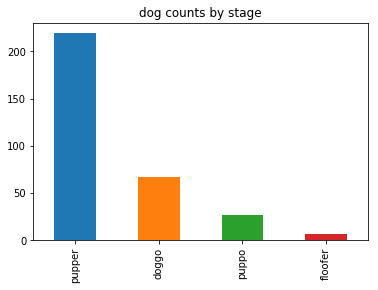

In [74]:
stage_count = df_stage['stage'].value_counts()
stage_count.plot.bar(title ='dog counts by stage', y = 'dog number', x = 'stage')

#### In all rating, the number of pupper is the largest.

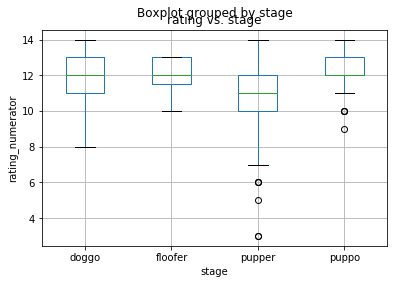

In [75]:
twitter_master.boxplot(column='rating_numerator', by ='stage')
plt.title('rating vs. stage')
plt.ylabel('rating_numerator')
plt.show()

#### The boxplot shows the lowest avarge rating and the lowest rating is pupper stage.

In [76]:
df_favorite = twitter_master[['favorite_count','rating_numerator']]

#there are several outlier number so that just choose the rating numerator less than 40
df_favorite = twitter_master[twitter_master['rating_numerator']<40]

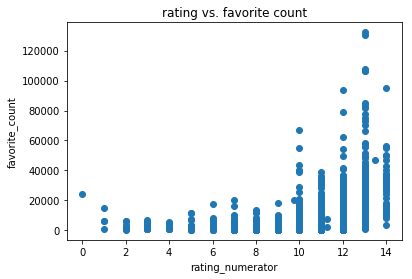

In [77]:
plt.scatter(df_favorite['rating_numerator'],df_favorite['favorite_count'])
plt.xlabel('rating_numerator')
plt.ylabel('favorite_count')
plt.title('rating vs. favorite count')
plt.show()

####  The plot shows the higher rating will get more likes which means there is a positive correlation between the rating and likes.

In [78]:
# change timestampe to datetime type
twitter_master.timestamp = pd.to_datetime(twitter_master.timestamp)

#set timestamp as index
twitter_master_timeseries = twitter_master.set_index(['timestamp'])
twitter_master_timeseries.head()

tweet_id              source  \
timestamp                                                     
2017-08-01 16:23:56  892420643555336193  Twitter for iPhone   
2017-08-01 00:17:27  892177421306343426  Twitter for iPhone   
2017-07-31 00:18:03  891815181378084864  Twitter for iPhone   
2017-07-30 15:58:51  891689557279858688  Twitter for iPhone   
2017-07-29 16:00:24  891327558926688256  Twitter for iPhone   

                                                                                                                                       expanded_urls  \
timestamp                                                                                                                                              
2017-08-01 16:23:56                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
2017-08-01 00:17:27                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2017-07-31 00:18:03                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
2017-07-30 15:58:51                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
2017-07-29 16:00:24  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

                     rating_numerator  rating_denominator      name stage  \
timestamp                                                                   
2017-08-01 16:23:56              13.0                10.0   Phineas   NaN   
2017-08-01 00:17:27              13.0                10.0     Tilly   NaN   
2017-07-31 00:18:03              12.0                10.0    Archie   NaN   
2017-07-30 15:58:51              13.0                10.0     Darla   NaN   
2017-07-29 16:00:24              12.0                10.0  Franklin   NaN   

                                                             jpg_url  img_num  \
timestamp                                                                       
2017-08-01 16:23:56  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
2017-08-01 00:17:27  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2017-07-31 00:18:03  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
2017-07-30 15:58:51  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
2017-07-29 16:00:24  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

                              p1   p1_conf  p1_dog                  p2  \
timestamp                                                                
2017-08-01 16:23:56       orange  0.097049   False               bagel   
2017-08-01 00:17:27    Chihuahua  0.323581    True            Pekinese   
2017-07-31 00:18:03    Chihuahua  0.716012    True            malamute   
2017-07-30 15:58:51  paper_towel  0.170278   False  Labrador_retriever   
2017-07-29 16:00:24       basset  0.555712    True    English_springer   

                      p2_conf  p2_dog                           p3   p3_conf  \
timestamp                                                                      
2017-08-01 16:23:56  0.085851   False                       banana  0.076110   
2017-08-01 00:17:27  0.090647    True                     papillon  0.068957   
2017-07-31 00:18:03  0.078253    True                       kelpie  0.031379   
2017-07-30 15:58:51  0.168086    True                      spatula  0.040836   
2017-07-29 16:00:24  0.225770    True  German_short-haired_pointer  0.175219   

                     p3_dog  retweet_count  favorite_count  
timestamp                                                   
2017-08-01 16:23:56   False           8842           39492  
2017-08-01 00:17:27    True           6480           33786  
2017-07-31 00:18:03    True           4301           25445  
2017-07-30 15:58:51   False    

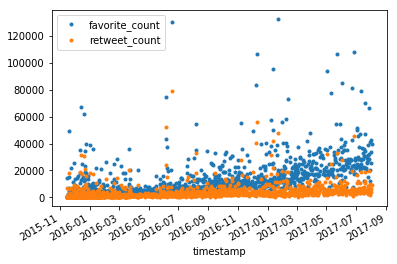

In [79]:
twitter_master_timeseries[['favorite_count', 'retweet_count']].plot(style='.')

#### The favorite count gets more with time, however the retweet count doesn't change a lot.